In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
from pyts.image import GramianAngularField

# Data extraction and processing

In [3]:
pwd

'D:\\EEN-366 project dataset'

In [4]:
#os.chdir('LLLG_csv_files')

In [5]:
#type_of_fault = 'LL_phaseAB'
filename = 'test_data_LLL.csv'
data = pd.read_csv(filename)
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
1,1.059300e-08,0.000172,-0.000345,0.000173,-0.000012,-6.438100e-07,0.000013
2,3.178000e-08,0.000517,-0.001036,0.000518,-0.000037,-1.932100e-06,0.000039
3,5.296700e-08,0.000862,-0.001726,0.000864,-0.000062,-3.221300e-06,0.000065
4,1.093700e-07,0.001780,-0.003565,0.001785,-0.000128,-6.654500e-06,0.000134
...,...,...,...,...,...,...,...
15827,4.998600e-01,-69.662000,-25.790000,95.452000,-5.881500,1.530900e+01,-9.576900
15828,4.998900e-01,-69.119000,-26.526000,95.645000,-5.969400,1.527000e+01,-9.449800
15829,4.999300e-01,-68.097000,-27.892000,95.989000,-6.131300,1.519400e+01,-9.212400
15830,4.999900e-01,-66.833000,-29.548000,96.381000,-6.324800,1.509700e+01,-8.922500


In [6]:
t = np.array(data['Unnamed: 0'])
Va = np.array(data['Unnamed: 1'])
Vb = np.array(data['Unnamed: 2'])
Vc = np.array(data['Unnamed: 3'])
Ia = np.array(data['Unnamed: 4'])
Ib = np.array(data['Unnamed: 5'])
Ic = np.array(data['Unnamed: 6'])

In [7]:
print(np.shape(Ia))
print(np.size(Ia))

(15832,)
15832


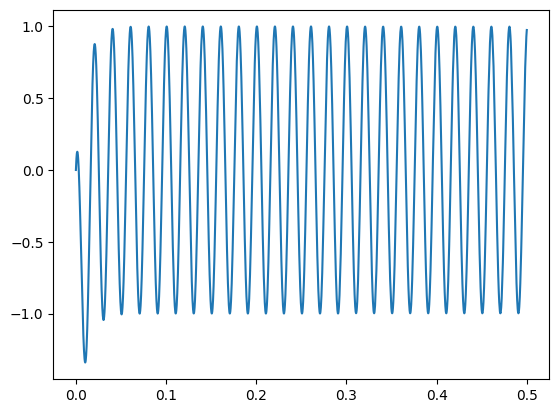

In [8]:
Va = Va/max(Va)
Vb = Vb/max(Vb)
Vc = Vc/max(Vc)

plt.plot(t,Vc)

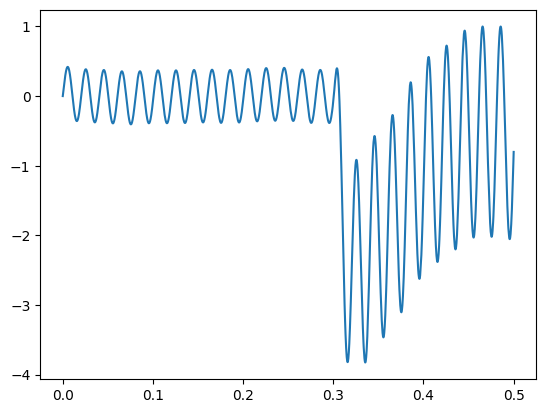

In [9]:
Ia = Ia/max(Ia)
Ib = Ib/max(Ib)
Ic = Ic/max(Ic)

plt.plot(t,Ic)

(1000,)


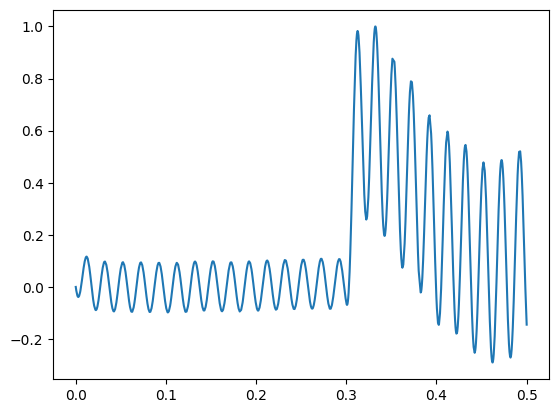

In [10]:
from tslearn.preprocessing import TimeSeriesResampler

time = TimeSeriesResampler(sz=1000).fit_transform(t)
t_ = np.squeeze(time)

V = TimeSeriesResampler(sz=1000).fit_transform(Va)
Va_ = np.squeeze(V)

V = TimeSeriesResampler(sz=1000).fit_transform(Vb)
Vb_ = np.squeeze(V)

V = TimeSeriesResampler(sz=1000).fit_transform(Vc)
Vc_ = np.squeeze(V)

I = TimeSeriesResampler(sz=1000).fit_transform(Ia)
Ia_ = np.squeeze(I)

I = TimeSeriesResampler(sz=1000).fit_transform(Ib)
Ib_ = np.squeeze(I)

I = TimeSeriesResampler(sz=1000).fit_transform(Ic)
Ic_ = np.squeeze(I)


print(np.shape(Ia_))
plt.plot(t_,Ia_)

In [12]:
#reshaping
print(np.shape(Va_))
Va_ = Va_.reshape(np.size(Va_))
Va_ = np.array([Va_])
print(np.shape(Va_))

Vb_ = Vb_.reshape(np.size(Vb_))
Vb_ = np.array([Vb_])

Vc_ = Vc_.reshape(np.size(Vc_))
Vc_ = np.array([Vc_])

Ia_ = Ia_.reshape(np.size(Ia_))
Ia_ = np.array([Ia_])

Ib_ = Ib_.reshape(np.size(Ib_))
Ib_ = np.array([Ib_])

Ic_ = Ic_.reshape(np.size(Ic_))
Ic_ = np.array([Ic_])

(1000,)
(1, 1000)


# Computing Gramian Angualr Field and constructing 3-D image from it

In [13]:
# Compute Gramian angular fields
gasf = GramianAngularField(method='summation')
Va_gasf = gasf.fit_transform(Va_)
gasf = GramianAngularField(method='summation')
Vb_gasf = gasf.fit_transform(Vb_)
gasf = GramianAngularField(method='summation')
Vc_gasf = gasf.fit_transform(Vc_)

gasf = GramianAngularField(method='summation')
Ia_gasf = gasf.fit_transform(Ia_)
gasf = GramianAngularField(method='summation')
Ib_gasf = gasf.fit_transform(Ib_)
gasf = GramianAngularField(method='summation')
Ic_gasf = gasf.fit_transform(Ic_)

In [14]:
print(np.shape(Va_gasf))
n = np.shape(Va_gasf)[1]
n

(1, 1000, 1000)


1000

In [17]:
#reshaping
Va_gasf = Va_gasf.reshape(n,n)
Vb_gasf = Vb_gasf.reshape(n,n)
Vc_gasf = Vc_gasf.reshape(n,n)

Ia_gasf = Ia_gasf.reshape(n,n)
Ib_gasf = Ib_gasf.reshape(n,n)
Ic_gasf = Ic_gasf.reshape(n,n)

print(np.shape(Va_gasf))

(1000, 1000)


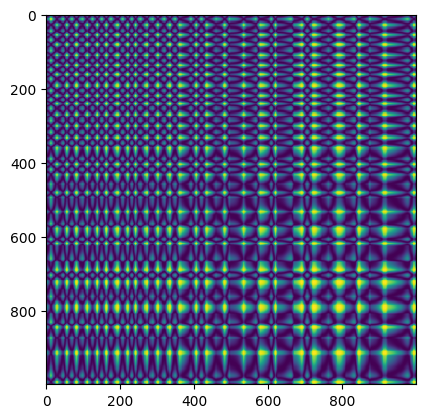

In [23]:
plt.imshow(Va_gasf)

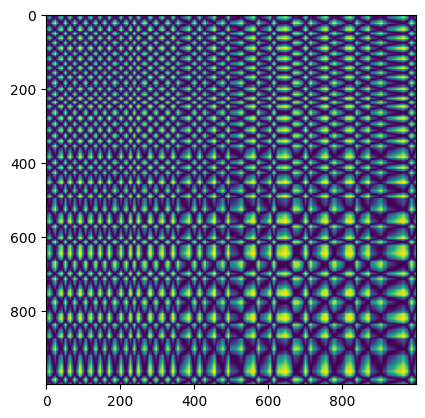

In [24]:
plt.imshow(Vb_gasf)

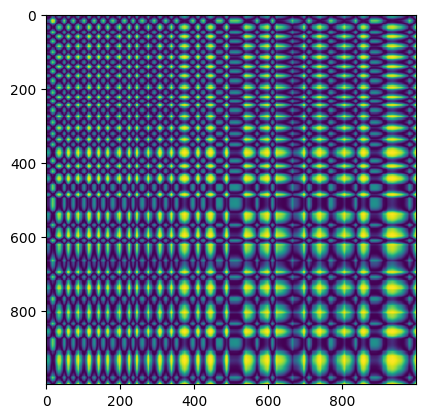

In [25]:
plt.imshow(Vc_gasf)

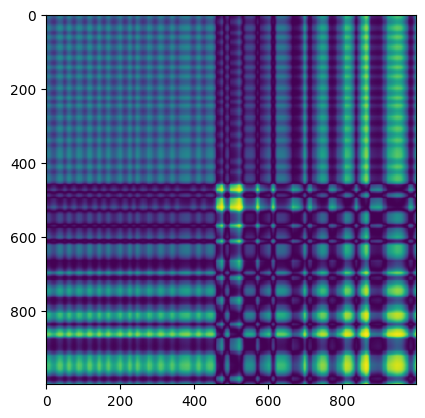

In [26]:
plt.imshow(Ia_gasf)

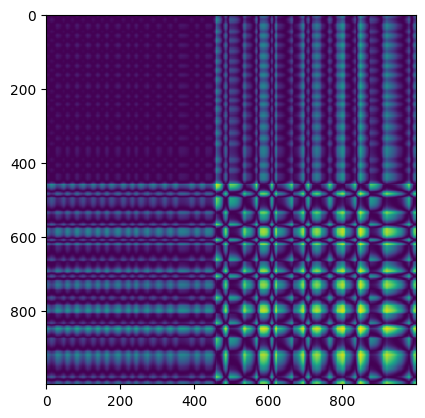

In [27]:
plt.imshow(Ib_gasf)

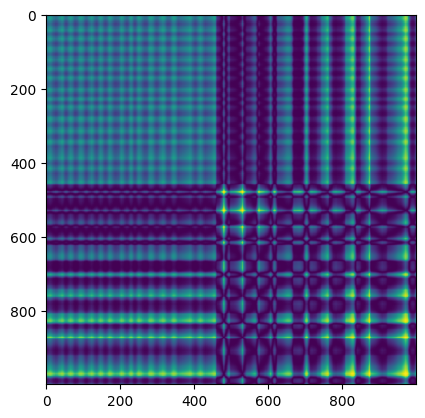

In [28]:
plt.imshow(Ic_gasf)

In [89]:
#combined_img = np.stack([VI_a_gasf,VI_b_gasf,VI_c_gasf], axis = 2)
#np.shape(combined_img)

In [90]:
#plt.imshow(combined_img)

In [91]:
#combined_img

# Saving image

In [29]:
from PIL import Image


img0 = Image.fromarray((Va_gasf* 255).astype(np.uint8))
print(np.shape(img0))
img1 = Image.fromarray((Vb_gasf* 255).astype(np.uint8))
img2 = Image.fromarray((Vc_gasf* 255).astype(np.uint8))
img3 = Image.fromarray((Ia_gasf* 255).astype(np.uint8))
img4 = Image.fromarray((Ib_gasf* 255).astype(np.uint8))
img5 = Image.fromarray((Ic_gasf* 255).astype(np.uint8))


WIDTH = 150
HEIGHT = 150

img0 = img0.resize((WIDTH, HEIGHT))
img1 = img1.resize((WIDTH, HEIGHT))
img2 = img2.resize((WIDTH, HEIGHT))
img3 = img3.resize((WIDTH, HEIGHT))
img4 = img4.resize((WIDTH, HEIGHT))
img5 = img5.resize((WIDTH, HEIGHT))

print(np.shape(img0))

(1000, 1000)
(150, 150)


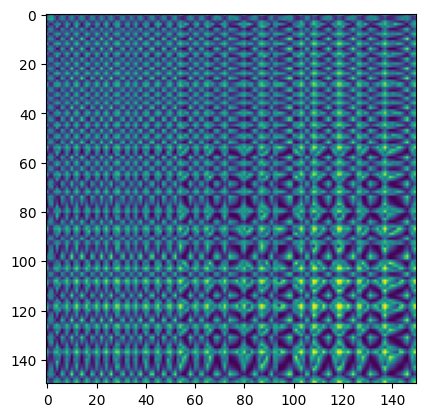

In [30]:
plt.imshow(img0)

In [31]:
pwd

'D:\\EEN-366 project dataset'

In [32]:
import os

image_path = 'D:\\EEN-366 project dataset\\test_images'
type_of_fault = 'LLL'

img0.save(os.path.join(image_path, str(type_of_fault + '0.jpg') ))
img1.save(os.path.join(image_path, str(type_of_fault + '1.jpg') ))
img2.save(os.path.join(image_path, str(type_of_fault + '2.jpg') ))
img3.save(os.path.join(image_path, str(type_of_fault + '3.jpg') ))
img4.save(os.path.join(image_path, str(type_of_fault + '4.jpg') ))
img5.save(os.path.join(image_path, str(type_of_fault + '5.jpg') ))